# SOE-MIA-V1E4-002
## Modulo 2 - Data, open data y Big Data
## Práctica Nro. 4

Datos de desempeño de puntualidad de las aerolíneas, detalles de llegadas y salidas de vuelos comerciales dentro de EE. UU., desde octubre de 1987 hasta abril de 2008 [Kaggle](https://www.kaggle.com/datasets/bulter22/airline-data?select=airline.csv.shuffle )

In [ ]:
## Instalación de librerias y dependencias

In [1]:
# Instalamos las dependencias para Spark
!apt-get update -qq > /dev/null
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [2]:
# descargamos la libreria de spark

# !wget -q https://dlcdn.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.5.6/spark-3.5.6-bin-hadoop3.tgz
!ls

sample_data  spark-3.5.6-bin-hadoop3.tgz


In [ ]:
!ls -l -h

In [3]:
# descomprimimos spark
# !find spark-3.5.1-bin-hadoop3.tgz
!tar xf /content/spark-3.5.6-bin-hadoop3.tgz

In [6]:
# Instalamos la libreria para python
!pip install -q findspark


In [4]:
# establecemos las variables de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.6-bin-hadoop3"

In [7]:
# iniciamos findspark
import findspark
findspark.init()


In [9]:
from pyspark.sql import SparkSession

spark = (
    SparkSession.builder
    .config("spark.ui.port","4050")
    .getOrCreate()
  )

In [10]:
# habilitamos una interfaz Visual de Apache (UI)
from google.colab import output

output.serve_kernel_port_as_window(4050, path='/jobs/index,html')

Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

## Descargamos un datasets

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bulter22/airline-data")

print("Path to dataset files:", path)

100%|██████████| 4.20G/4.20G [00:42<00:00, 107MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bulter22/airline-data/versions/2


In [ ]:
#!ls -l -h $path

In [12]:
# movemos los datasets
! mkdir /content/airline-data
! mv $path /content/airline-data/

In [17]:
# movemos los datasets
!ls -l -h /content/airline-data/2

total 12G
-rw-r--r-- 1 root root 12G Aug 18 23:38 airline.csv.shuffle
-rw-r--r-- 1 root root 43K Aug 18 23:38 carriers.csv


## Analizamos el dataset

In [13]:
# direccionamos la ubicación del dataset
data = '/content/airline-data/2/airline.csv.shuffle'
# 3. Create a Spark DataFrame from the sample data and the defined schema
df = spark.read.format("csv") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(data)
# 4. Display the first few rows of the created DataFrame


In [15]:
# visualizamos algunos registros
df.show()

+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+
|ActualElapsedTime|AirTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|CancellationCode|Cancelled|CarrierDelay|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|LateAircraftDelay|Month|NASDelay|Origin|SecurityDelay|TailNum|TaxiIn|TaxiOut|UniqueCarrier|WeatherDelay|Year|
+-----------------+-------+--------+-------+----------+----------+--------------+----------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+
|               53|     32|      -8|   1642|      1650|      1545|            65|             

In [14]:
# contamos la cantidad de registros
df.count()

123534969

In [16]:
# Group by the "year" column and count the occurrences
rating_counts = df.groupBy("Year").count().orderBy("Year")

# Show the results
rating_counts.show()

+----+-------+
|Year|  count|
+----+-------+
|1987|1311826|
|1988|5202096|
|1989|5041200|
|1990|5270893|
|1991|5076925|
|1992|5092157|
|1993|5070501|
|1994|5180048|
|1995|5327435|
|1996|5351983|
|1997|5411843|
|1998|5384721|
|1999|5527884|
|2000|5683047|
|2001|5967780|
|2002|5271359|
|2003|6488540|
|2004|7129270|
|2005|7140596|
|2006|7141922|
+----+-------+
only showing top 20 rows



Representamos gráficamente los resultados

In [18]:
import matplotlib.pyplot as plt

# Convert the Spark DataFrame to a Pandas DataFrame for easier plotting
ordered_rating_counts_pd = rating_counts.toPandas()

In [23]:
ordered_rating_counts_pd

,Year,count
0,1987,1311826
1,1988,5202096
2,1989,5041200
3,1990,5270893
4,1991,5076925
5,1992,5092157
6,1993,5070501
7,1994,5180048
8,1995,5327435
9,1996,5351983


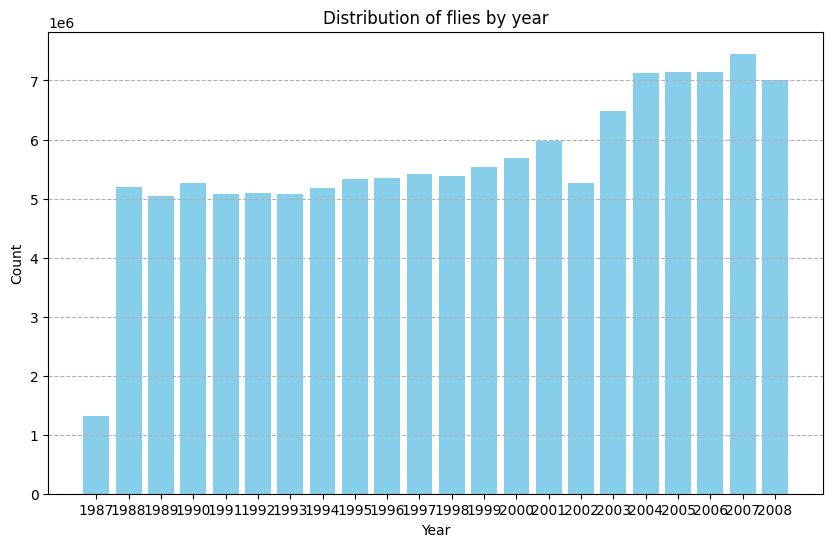

In [20]:
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ordered_rating_counts_pd["Year"], ordered_rating_counts_pd["count"], color='skyblue')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Distribution of flies by year")
plt.xticks(ordered_rating_counts_pd["Year"])
plt.grid(axis='y', linestyle='--')
plt.show()

In [21]:
import plotly.express as px

# Create an interactive bar chart using Plotly Express
fig = px.bar(ordered_rating_counts_pd, x="Year", y="count", title="Distribution of flies by year")

# Update layout for better appearance
fig.update_layout(xaxis_title="Year", yaxis_title="Count")

# Show the plot
fig.show()

In [22]:
df.columns

['ActualElapsedTime',
 'AirTime',
 'ArrDelay',
 'ArrTime',
 'CRSArrTime',
 'CRSDepTime',
 'CRSElapsedTime',
 'CancellationCode',
 'Cancelled',
 'CarrierDelay',
 'DayOfWeek',
 'DayofMonth',
 'DepDelay',
 'DepTime',
 'Dest',
 'Distance',
 'Diverted',
 'FlightNum',
 'LateAircraftDelay',
 'Month',
 'NASDelay',
 'Origin',
 'SecurityDelay',
 'TailNum',
 'TaxiIn',
 'TaxiOut',
 'UniqueCarrier',
 'WeatherDelay',
 'Year']

In [34]:
# ordered_rating_counts_pd['count'].value_counts()
ordered_rating_counts_pd.sum()

,0
Year,43945
count,123534969


In [ ]:
123534969

In [ ]:
spark.stop()